In [ ]:
Using the data on births in the United States, provided by the Centers for Disease Control (CDC),
Find i) Total number of US births by year and gender 
ii) Average daily births by day of week and decade

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

births = pd.read_csv('births.csv') 
print(births.head())


births = births.dropna()

print(births.dtypes)
print(births.describe())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object
               year         month           day        births
count  15067.000000  15067.000000  15067.000000  15067.000000
mean    1978.417402      6.516427     17.769894   4678.631513
std        5.762018      3.449554     15.284034   1003.104707
min     1969.000000      1.000000      1.000000      1.000000
25%     1973.000000      4.000000      8.000000   4344.000000
50%     1978.000000      7.000000     16.000000   4785.000000
75%     1983.000000     10.000000     24.000000   5247.000000
max     1988.000000     12.000000     99.000000   6527.000000


gender        F        M
year                    
1969    1753634  1846572
1970    1819164  1918636
1971    1736774  1826774
1972    1592347  1673888
1973    1533102  1613023
1974    1543005  1627626
1975    1535546  1618010
1976    1547613  1628863
1977    1623363  1708796
1978    1626324  1711976
1979    1705837  1793958
1980    1762459  1855522
1981    1772037  1863478
1982    1797239  1888218
1983    1775299  1867522
1984    1791802  1881766
1985    1834774  1930290
1986    1833708  1926987
1987    1860111  1953105
1988    1909210  2004583


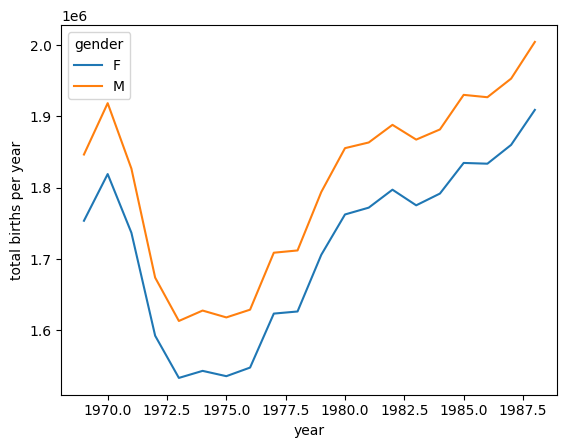

In [3]:
jj=births.pivot_table( index='year', columns='gender',values='births', aggfunc='sum')
print(jj)
jj.plot()
plt.ylabel('total births per year');

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=15067, freq=None)
            year  month  day gender  births  decade  dayofweek
1969-01-01  1969      1    1      F    4046    1960        2.0
1969-01-01  1969      1    1      M    4440    1960        2.0
1969-01-02  1969      1    2      F    4454    1960        3.0
1969-01-02  1969      1    2      M    4548    1960        3.0
1969-01-03  1969      1    3      F    4548    1960        4.0


<Axes: xlabel='dayofweek'>

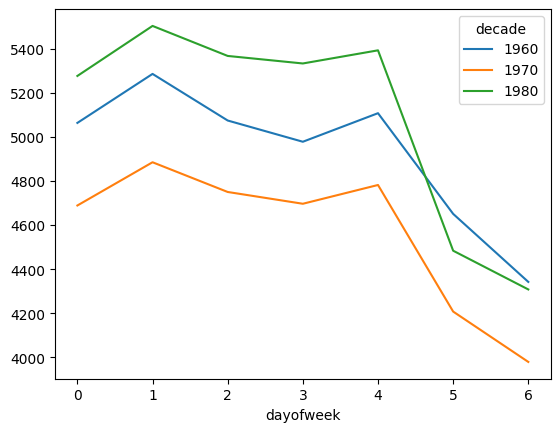

In [4]:
births['decade'] = 10 * (births['year'] // 10)
#print(births['decade'])
#print(births)

#births.pivot_table('births', index='decade', columns='gender', aggfunc='sum').plot()
print(type(births))
births.day = births.day.astype('int64')

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d',errors='coerce')
print(births.index)
births['dayofweek'] = births.index.dayofweek

#print(births)                                                        
print(births.head())

births.pivot_table(index='dayofweek', columns='decade', values='births', aggfunc='mean').plot()
#plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
#plt.ylabel('mean births by day');
